In [1]:
import keepa
import numpy as np
import requests
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta

In [2]:
with open("api_key.txt") as key_file :
    api_key = key_file.readline().strip()
api = keepa.Keepa(api_key)

In [37]:
# do a product search to filter out books that may be good to look at
book_params = {
    'deltaPercent30_USED_gte': 20,
    'deltaPercent30_USED_lte': 99,
    'deltaPercent90_COUNT_USED_gte': -50,
    'deltaPercent90_COUNT_USED_lte': 99,
    'avg180_SALES_gte': 0,
    'avg180_SALES_lte': 7000000,
    'rootCategory': 283155
}
# don't include list price because there's no way to compare the list price with the used price at this point in the process
# have Mark go through the other parameters and see if there's anything he thinks would also be helpful to include

In [30]:
test_params = {
    "avg180_SALES_gte": 0,
    "avg180_SALES_lte": 10100,
    #"current_USED_gte": 0,
    #"current_USED_lte": 749,
    #"avg30_USED_gte": 1200,
    #"avg30_USED_lte": 1000000000,
    #"current_LISTPRICE_gte": 5000,
    #"current_LISTPRICE_lte": 100000000,
    #"avg180_LISTPRICE_gte": 5000,
    #"avg180_LISTPRICE_lte": 100000000,
    "rootCategory": 283155,
    "perPage": 10000000
}

In [31]:
test = api.product_finder(test_params)

Exception: REQUEST_REJECTED

In [16]:
len(test)

765

In [42]:
test2 = api.product_finder(test_params)

In [6]:
# now call the api to get the data on all these books
book_data = api.query(good_books)

100%|██████████| 50/50 [00:06<00:00,  7.20it/s]


In [4]:
linalg = api.query('032198238X')

100%|██████████| 1/1 [00:02<00:00,  2.73s/it]


 2018-07-11 07:02:00   $1445675.00
 2018-07-11 08:40:00   $1446624.00
 2018-07-11 09:32:00   $1445329.00
 2018-07-11 11:12:00   $1444317.00
 2018-07-11 13:44:00   $1441329.00
 2018-07-11 14:44:00   $1441405.00
 2018-07-11 16:24:00   $1441006.00
 2018-07-11 18:00:00   $1443836.00
 2018-07-11 18:50:00   $1445108.00
 2018-07-11 20:34:00   $1450104.00
 2018-07-11 22:12:00   $1451508.00
 2018-07-11 23:52:00   $1456506.00
 2018-07-12 00:44:00   $1457689.00
 2018-07-12 02:20:00   $1461623.00
 2018-07-12 04:00:00   $1462723.00
 2018-07-12 06:48:00   $1467303.00
 2018-07-12 08:26:00   $1468435.00
 2018-07-12 10:06:00   $1467406.00
 2018-07-12 11:46:00   $1466610.00
 2018-07-12 13:26:00   $1464991.00
 2018-07-12 14:22:00   $1464457.00
 2018-07-12 15:56:00   $1463636.00
 2018-07-12 17:52:00   $1466331.00
 2018-07-12 20:28:00   $1472014.00
 2018-07-12 22:04:00   $1473343.00
 2018-07-12 23:44:00   $1477961.00
 2018-07-13 01:28:00   $1479179.00
 2018-07-13 03:04:00   $1482658.00
 2018-07-13 03:56:00

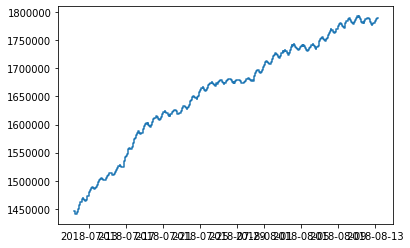

In [82]:
# Access new price history and associated time data
newprice = book_data[0]['data']['SALES']
newpricetime = book_data[0]['data']['SALES_time']

plt.step(newpricetime[1000:1500], newprice[1000:1500])

# print the first 10 prices
#print('%20s   %s' % ('Date', 'Price'))
for i in range(1000,1500):
    print('%20s   $%.2f' % (newpricetime[i], newprice[i]))

In [ ]:
two_yrs_ago = datetime.datetime.now() - relativedelta(years=2)
prices_sold_at = []
for book in range(len(book_data)) :
    last_two_years = book_data[book]['data']['SALES_time'] > two_yrs_ago
    for day in np.where(last_two_years) :
        

In [86]:
two_yrs_ago = datetime.datetime.now() - relativedelta(years=2)
prices_sold_at = []
last_two_years = book_data[0]['data']['SALES_time'] > two_yrs_ago
book_data[0]['data']['SALES_time'][np.where(last_two_years)] #- datetime.timedelta(days=1)
for day in np.where(last_two_years) :
    if ((book_data[0]['data']['SALES'][day] - 
        book_data[0]['data']['SALES'][day - 1]) / 
        (book_data[0]['data']['SALES'][day]) >= .02) :
        day_sold = book_data[0]['data']['SALES_time'][day] - datetime.timedelta(days=1)
        day_sold_index = book_data[0]['data']['USED_time'][day_sold.date()]
        prices_sold_at.append(book_data[0]['data']['USED'][day_sold_index])
        #min(DTlist,key=lambda date : abs(dt-date))
# - datetime.timedelta(days=1)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [85]:
book_data[0]['data']['SALES_time'][np.where(last_two_years)][0].date()

datetime.date(2018, 4, 29)

['1118059816',
 '0130420166',
 '0195178777',
 '1592801986',
 '1413018793',
 '0870335057',
 '094172803X',
 '1859848907',
 '031624967X',
 '1563475634']

In [60]:
book_data = api.query(test[:10])

100%|██████████| 10/10 [00:05<00:00,  1.79it/s]


In [29]:
2 year sales rank average 
sales rank average for selected dates

vv these two can try using and see if it improves the model. Can also switch them out for new price
average list price for selected dates
current list price

current used price
used avg for selected dates

(can later factor in used offer count)

True

In [61]:
# look at how the used price now compares to the used price normally
#valuation = pd.DataFrame()
diffs = {2018 : [], 2019 : []}
sales = {2018 : [], 2019 : []}
years = [2018,2019]
diff_avg = []
sales_avg = []
for book in range(len(book_data)) :
    used_current = book_data[book]['data']['USED'][-1]
    for year in years :
        start = book_data[book]['data']['USED_time'] > datetime.datetime(year, 8, 15, 0, 0)
        end = book_data[book]['data']['USED_time'] < datetime.datetime(year, 9, 16, 0, 0)
        high_tide = np.where(start & end)
        diff = (np.average(book_data[book]['data']['USED'][high_tide]) - used_current) / used_current
        diffs[year].append(diff)
        
        start = book_data[book]['data']['SALES_time'] > datetime.datetime(year, 8, 15, 0, 0)
        end = book_data[book]['data']['SALES_time'] < datetime.datetime(year, 9, 16, 0, 0)
        high_tide = np.where(start & end)
        sales[year].append(np.average(book_data[book]['data']['SALES'][high_tide]))
    diff_avg.append(np.average([diffs[2018][book],diffs[2019][book]], weights=[.4,.6]))
    sales_avg.append(np.average([diffs[2018][book],diffs[2019][book]]))

In [62]:
# look at the 2 year sales rank average
two_yrs_ago = datetime.datetime.now() - relativedelta(years=2)
two_yr_sales_avg = []
for book in range(len(book_data)) :
    within_2yrs = book_data[book]['data']['SALES_time'] > two_yrs_ago
    two_yr_sales_avg.append(np.average(book_data[book]['data']['SALES'][within_2yrs]))

In [63]:
diff_avg

[7.794544061302682,
 2.9476121562952247,
 12.605944391179293,
 12.136442141623487,
 1.7423847926267286,
 -0.02074380165289258,
 nan,
 33.48574444848927,
 1.6946377728566904,
 4.314431818181818]

'1859848907'

In [24]:
# give each book a score
weights = [sales = .0000031, two_yr = .000001, diffs = 50]
scores = []
for book in range(len(book_data)) :
    metrics = [sales_avg[book], two_yr_sales_avg[book], diff_avg[book]]
    scores.append(np.dot(metrics, weights))

12

In [ ]:
### long term project thoughts - can include 'isEligibleForSuperSaverShipping' if that would make a difference